In [1]:
import os
import wandb
import matplotlib.pyplot as plt
import logging

from pairwise_network import env, wandb_api
from eps_utils import epsv5_cmap

## Setup

In [2]:
def filter_runs(runs, filter):
    filtered = runs.copy()
    for key, value in filter.items():
        filtered = wandb_api.filter_runs_by_cfg(filtered, key, value)
    return filtered

In [3]:
tags = ['eps', 'prelim']
# version = 'epsv4'
version = 'epsv5'
filter = {
    'dataset':version,
    'prune_iterations_max':0,
    'hidden': [10,10],
    'weight_decay': 0,
    # 'lr': 0.1
}
cmap = epsv5_cmap
title_prefix = '$a_2$'
drop_tags = ['r1*', 'bz*', 'bt*']
# drop_tags = None

file_prefix = f'act-{version}'
partition = 'eval'
result_dir = env.results_dir
ext = '.pdf'
# env.set_log_level()

In [8]:
runs = wandb_api.get_runs_filtered_by_tag(tags)
logging.info('Filtering runs by config')

print(f'Number of runs: {len(runs)}')

Number of runs: 83


## Baseline

In [9]:
filter['init_scheme'] = 'random'
filter['lr'] = 0.0005
filtered_runs = filter_runs(runs, filter)
print(f'Number of runs: {len(filtered_runs)}')

Number of runs: 4


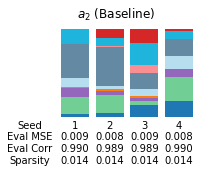

In [10]:
# fig, ax = plt.subplots(1, figsize=(5, 6))
fig, ax = plt.subplots(1, figsize=(3, 2.5))
ax.set_title(title_prefix + ' (Baseline)')
wandb_api.sort_runs_by_config_key(filtered_runs, 'seed', reverse=False)
wandb_api.plot_runs_sn_act_dist(filtered_runs, partition=partition,
    rename_subnets=True, cmap=cmap, ax=ax, legend='none',
    add_xtick_metrics=True, use_symh_tags=True)

In [11]:
file_path = os.path.join(result_dir, file_prefix + '-baseline' + ext)
fig.savefig(file_path, facecolor='white')
#

## Identical Subnets

In [12]:
filter['init_scheme'] = 'identical_subnets'
filter['lr'] = 0.001
filtered_runs = filter_runs(runs, filter)
print(f'Number of runs: {len(filtered_runs)}')

Number of runs: 4


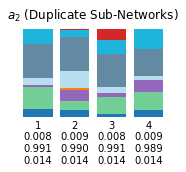

In [13]:
# fig, ax = plt.subplots(1, figsize=(5, 6))
fig, ax = plt.subplots(1, figsize=(2.5, 2.5))
ax.set_title(title_prefix + ' (Duplicate Sub-Networks)')
wandb_api.sort_runs_by_config_key(filtered_runs, 'seed', reverse=False)
wandb_api.plot_runs_sn_act_dist(filtered_runs, partition=partition,
    rename_subnets=True, cmap=cmap, ax=ax, legend='none',
    add_xtick_metrics=False, use_symh_tags=True)

In [14]:
file_path = os.path.join(result_dir, file_prefix + '-identical' + ext)
fig.savefig(file_path, facecolor='white')

## Prune

In [4]:
tags = ['eps', 'prune-no-des']
filter = {
    'dataset':version,
    'hidden': [10,10],
    'weight_decay': 0,
    'lr': 0.001,
    'prune_amount': 0.1,
    'init_scheme': 'identical_subnets'
}
runs = wandb_api.get_runs_filtered_by_tag(tags)
filtered_runs = filter_runs(runs, filter)
print(f'Number of runs: {len(filtered_runs)}')

Number of runs: 4


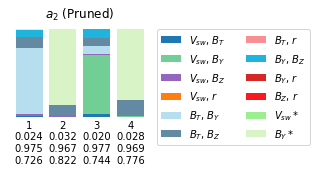

In [5]:
# fig, ax = plt.subplots(1, figsize=(5, 6))
fig, ax = plt.subplots(1, figsize=(4.5, 2.5))
ax.set_title(title_prefix + ' (Pruned)')
wandb_api.sort_runs_by_config_key(filtered_runs, 'seed', reverse=False)
wandb_api.plot_runs_sn_act_dist(filtered_runs, partition=partition,
    rename_subnets=True, cmap=cmap, ax=ax, legend='right',
    add_xtick_metrics=False, use_symh_tags=True, drop_tags=drop_tags, ncols=2)

In [19]:
file_path = os.path.join(result_dir, file_prefix + '-prune' + ext)
fig.savefig(file_path, facecolor='white')